<a href="https://colab.research.google.com/github/ksushrut/CoinClassifier/blob/main/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coin Classification

# Data Exploration

In [1]:
# Import All necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import json
from PIL import Image
import os

import cv2
import random

from google.colab import drive

In [2]:
# Connect with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### All the required paths

In [4]:
# Folder path to the dataset
BASE_DIR = '/content/drive/MyDrive/CoinImages'
PROCESSED_DIR = os.path.join(BASE_DIR, 'PreprocessedCoinImages')

# CSV paths
CSV_DIR = os.path.join(BASE_DIR, 'csv')
raw_csv = os.path.join(CSV_DIR, 'raw_images.csv')
processed_csv = os.path.join(CSV_DIR, 'processed_data.csv')

# Load dataset
data_raw = pd.read_csv(raw_csv)
data_processed = pd.read_csv(processed_csv)

#REMOVE THIS ONCE NEW DATA IS ADDED

In [5]:

# Number of Countries in the dataset
countries = data_raw['country'].unique()

countries

array(['United States', 'India', 'Nepal', 'Japan', 'New Zealand',
       'Australia', 'Canada', 'United Kingdom'], dtype=object)

## Information About the Data

The dataset contains images of coins from 8 different countries that are currently in circulation. Countries Include:


1.   Australia
2.   Canada
3.   India
4.   Japan
5.   Nepal
6.   New Zealand
7.   United Kingdom
8.   United States

All images will be stored in a main folder called CoinImages. Within this folder, there will be separate subfolders for each country, such as Australia, United States, India, etc. Each country's folder will further contain subfolders corresponding to specific coin denominations like 5c, 50c, $1, and others. Additionally, these denomination folders will include images labeled sequentially and marked with either an "h" (heads) or a "t" (tails), such as 1h, 1t, 2h, 2t, clearly distinguishing between the heads and tails sides of each coin.




### CSV File

To make it easier for accessing data, we decided to create csv files for raw data and processed data. The Fields in data include:



1.   **URL** [string]: The location of the each image in the drive.
2.   **image name** [string]: The filename of the image with extension.
3.   **width** [int]: The width of the image (in pixel).
4.   **height** [int]: The height of the image (in pixel).
5.   **country** [string]: The country it belongs to.
6.   **class** [string]: The denomination of the coin with the currency name.

There are two csv files; one for raw collected images and one for processed images.

BASE_DIR > 'csv/' > [csv filename]

In [6]:
# Data Sample
data_raw.head()

,URL,image name,country,width,height,label
0,/content/drive/My Drive/CoinImages//United Sta...,1t.jpeg,United States,225,225,USD 1¢
1,/content/drive/My Drive/CoinImages//United Sta...,2t.jpeg,United States,225,225,USD 1¢
2,/content/drive/My Drive/CoinImages//United Sta...,3t.jpeg,United States,225,225,USD 1¢
3,/content/drive/My Drive/CoinImages//United Sta...,4t.jpeg,United States,225,225,USD 1¢
4,/content/drive/My Drive/CoinImages//United Sta...,5t.jpeg,United States,225,225,USD 1¢


In [7]:
# Information about the data
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2427 entries, 0 to 2426
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   URL         2427 non-null   object
 1   image name  2427 non-null   object
 2   country     2427 non-null   object
 3   width       2427 non-null   int64 
 4   height      2427 non-null   int64 
 5   label       2427 non-null   object
dtypes: int64(2), object(4)
memory usage: 113.9+ KB


In [8]:
# Describe the numerical columns of the data, i.e, width and height
data_raw.describe()

,width,height
count,2427.000000,2427.000000
mean,438.611454,433.462711
std,310.765338,313.084625
min,100.000000,100.000000
25%,225.000000,225.000000
50%,322.000000,314.000000
75%,500.000000,500.000000
max,3072.000000,4096.000000


In [9]:
data_raw['country'].value_counts()

,count
country,
United Kingdom,418
Canada,352
Australia,306
Japan,302
United States,300
Nepal,250
New Zealand,250
India,249


In [10]:
data_raw.groupby(['country', 'label'])[['country', 'label']].value_counts()

country         label           
Australia       AUD 1 Dollar        50
                AUD 10 Cents        50
                AUD 2 Dollar        52
                AUD 20 Cents        50
                AUD 5 Cents         52
                AUD 50 Cents        52
Canada          1 cent              50
                1 dollar            50
                10 cents            50
                2 dollars           50
                25 cents            50
                5 cents             52
                50 cents            50
India           INR 10Rs            50
                INR 1Re             50
                INR 20Rs            49
                INR 2Rs             50
                INR 5Rs             50
Japan           1 Yen               51
                10 Yen              51
                100 Yen             50
                5 Yen               50
                50 Yen              50
                500 Yen             50
Nepal           1 Nepali Paisa      50
                1 Nepali Rupee      50
                2 Nepali Rupee      50
                25  Nepali Paisa    50
                5 Nepali Rupee      50
New Zealand     NZ 10 c             50
                NZ 20 c             50
                NZ 50 c             50
                NZ Dollar 1         50
                NZ Dollar 2         50
United Kingdom  GBP 1 Penny         50
                GBP 1 Pound         52
                GBP 10 Pence        52
                GBP 2 Pence         50
                GBP 2 Pound         52
                GBP 20 Pence        58
                GBP 5 Pence         52
                GBP 50 Pence        52
United States   USD 1$              50
                USD 10¢             50
                USD 1¢              50
                USD 25¢             50
                USD 50¢             50
                USD 5¢              50
Name: count, dtype: int64

In [11]:
data_processed.groupby(['country', 'label'])[['country', 'label']].value_counts()

country         label          
Australia       AUD 1 Dollar       50
                AUD 10 Cents       50
                AUD 2 Dollar       52
                AUD 20 Cents       50
                AUD 5 Cents        52
                AUD 50 Cents       52
Canada          1 cent             49
                1 dollar           50
                10 cents           50
                2 dollars          50
                25 cents           50
                5 cents            52
                50 cents           50
India           INR 10Rs           49
                INR 1Re            50
                INR 20Rs           49
                INR 2Rs            50
                INR 5Rs            50
Japan           1 Yen              50
                10 Yen             50
                100 Yen            50
                5 Yen              50
                50 Yen             50
                500 Yen            50
Nepal           1 Nepali Paisa     50
                1 Nepali Rupee     50
                2 Nepali Rupee     50
                25 Nepali Paisa    50
                5 Nepali Rupee     50
New Zealand     NZ 10 c            50
                NZ 20 c            50
                NZ 50 c            50
                NZ Dollar 1        50
                NZ Dollar 2        50
United Kingdom  GBP 1 Penny        50
                GBP 1 Pound        52
                GBP 10 Pence       52
                GBP 2 Pence        50
                GBP 2 Pound        52
                GBP 20 Pence       58
                GBP 5 Pence        52
                GBP 50 Pence       52
United States   USD 1$             50
                USD 10¢            50
                USD 1¢             50
                USD 25¢            50
                USD 50¢            50
                USD 5¢             50
Name: count, dtype: int64

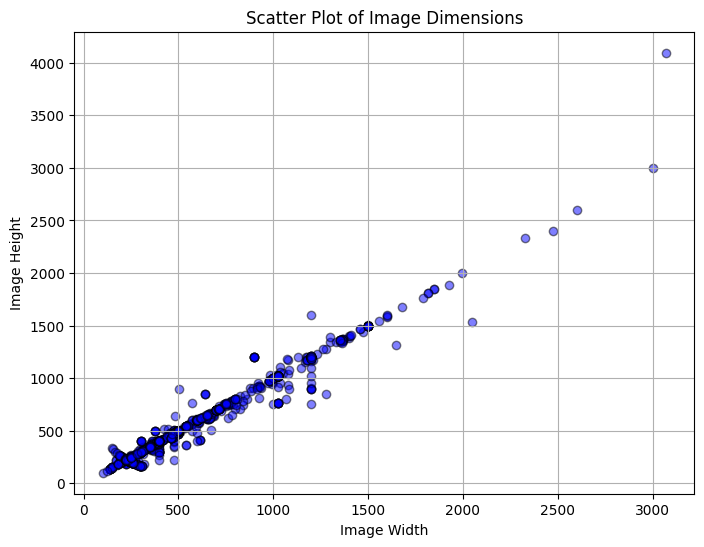

In [12]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data_raw['width'], data_raw['height'], alpha=0.5, c='blue', edgecolors='black')

# Labels and title
plt.xlabel('Image Width')
plt.ylabel('Image Height')
plt.title('Scatter Plot of Image Dimensions')
plt.grid(True)

# Show the plot
plt.show()

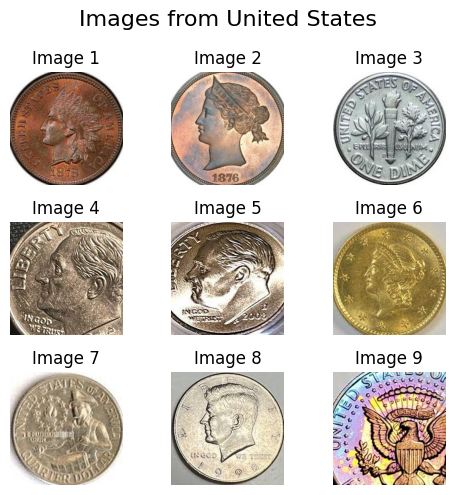

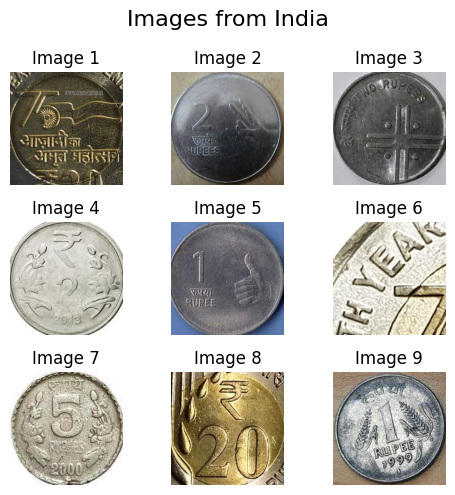

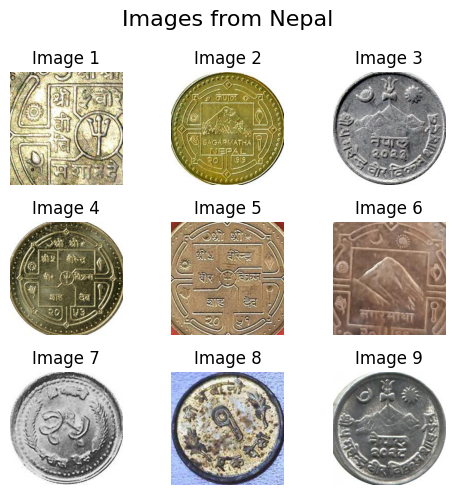

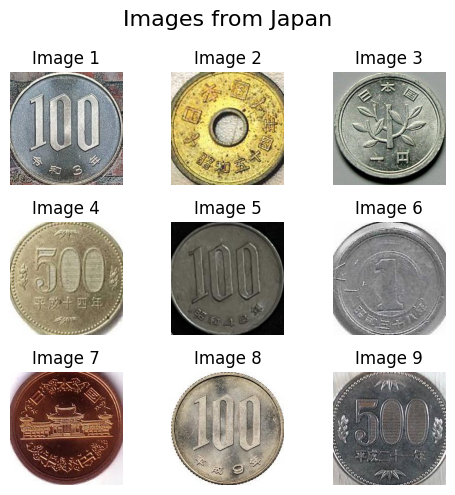

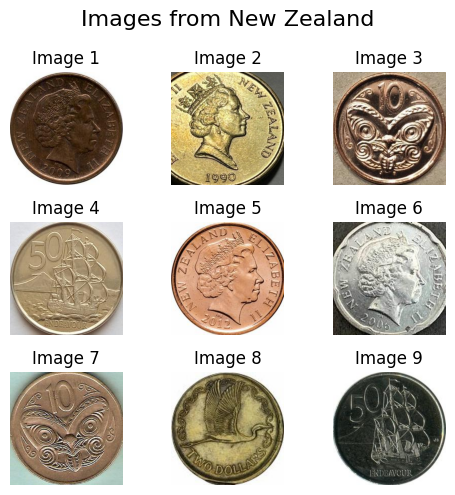

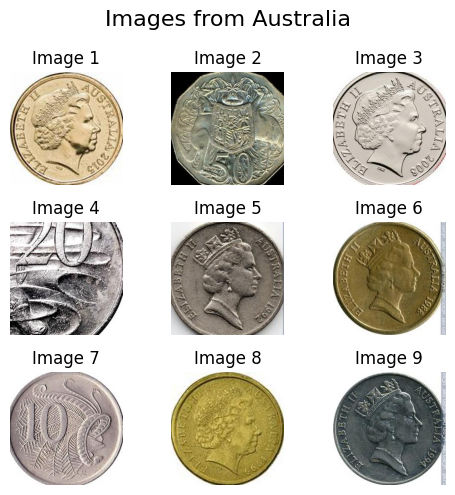

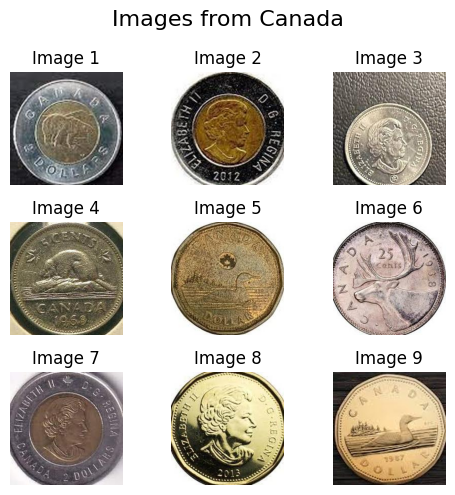

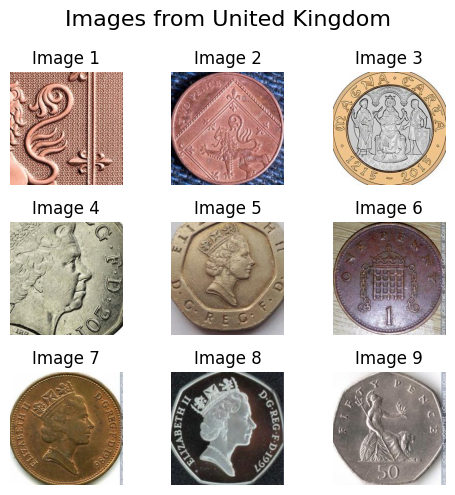

In [13]:
#Prerequisite for this cell: Right click on CoinImages in drive. Organize and then add short cut to My Drive
image_files = [f for f in os.listdir(PROCESSED_DIR) if f.endswith(('.jpg', '.png', '.jpeg'))]


# Loop through each country folder
for country in countries:
    country_path = os.path.join(PROCESSED_DIR, country)

    # Collect all images from this country's subfolders
    image_files = []
    for root, _, files in os.walk(country_path):
        for file in files:
            if file.lower().endswith((".jpg", ".jpeg", ".png")):
                image_files.append(os.path.join(root, file))

    # If no images found, skip this country
    if len(image_files) == 0:
        print(f"No images found for {country}")
        continue

    # Select 9 random images (or fewer if less than 9 exist)
    random_images = random.sample(image_files, min(9, len(image_files)))

    # Display images in a 3x3 grid
    fig, axes = plt.subplots(3, 3, figsize=(5, 5))
    fig.suptitle(f"Images from {country}", fontsize=16)

    for i, ax in enumerate(axes.flat):
        if i < len(random_images):
            img_path = random_images[i]
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            ax.imshow(img)
            ax.set_title(f"Image {i+1}")
        ax.axis("off")  # Hide axes if no image

    plt.tight_layout()
    plt.show()